In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
folderpath=r"C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy"
os.chdir(folderpath)
print("current directory:",os.getcwd())

current directory: C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy


In [3]:
print("C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing")


C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing


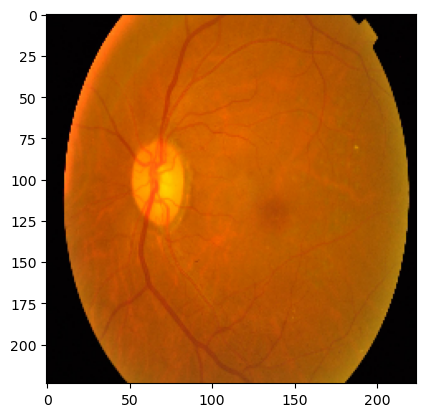

In [4]:
img = image.load_img("C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing\\Mild\\0a61bddab956.png")
plt.imshow(img)

In [5]:
for dirname, _, filenames in os.walk('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\0024cdab0c1e.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\00cb6555d108.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\0124dffecf29.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\01b3aed3ed4c.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\0369f3efe69b.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\03e25101e8e8.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\04ac765f91a1.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\059bc89df7f4.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\05a5183c92d0.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\0684311afdfc.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing\Mild\06b71823f9cd.png
C:\Users\santhosh\OneDrive\Desktop\diabetic retinopath

In [6]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\train\\',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\validation\\',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [7]:
!pip install -q efficientnet

In [8]:
import efficientnet.tfkeras as efn

In [9]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.00001
        return lr
    elif epoch<=30:
        lr=0.00001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [10]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

In [30]:
history=model.fit(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=5,verbose=1)

Epoch 1/5


KeyboardInterrupt: 

In [12]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(25,20), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

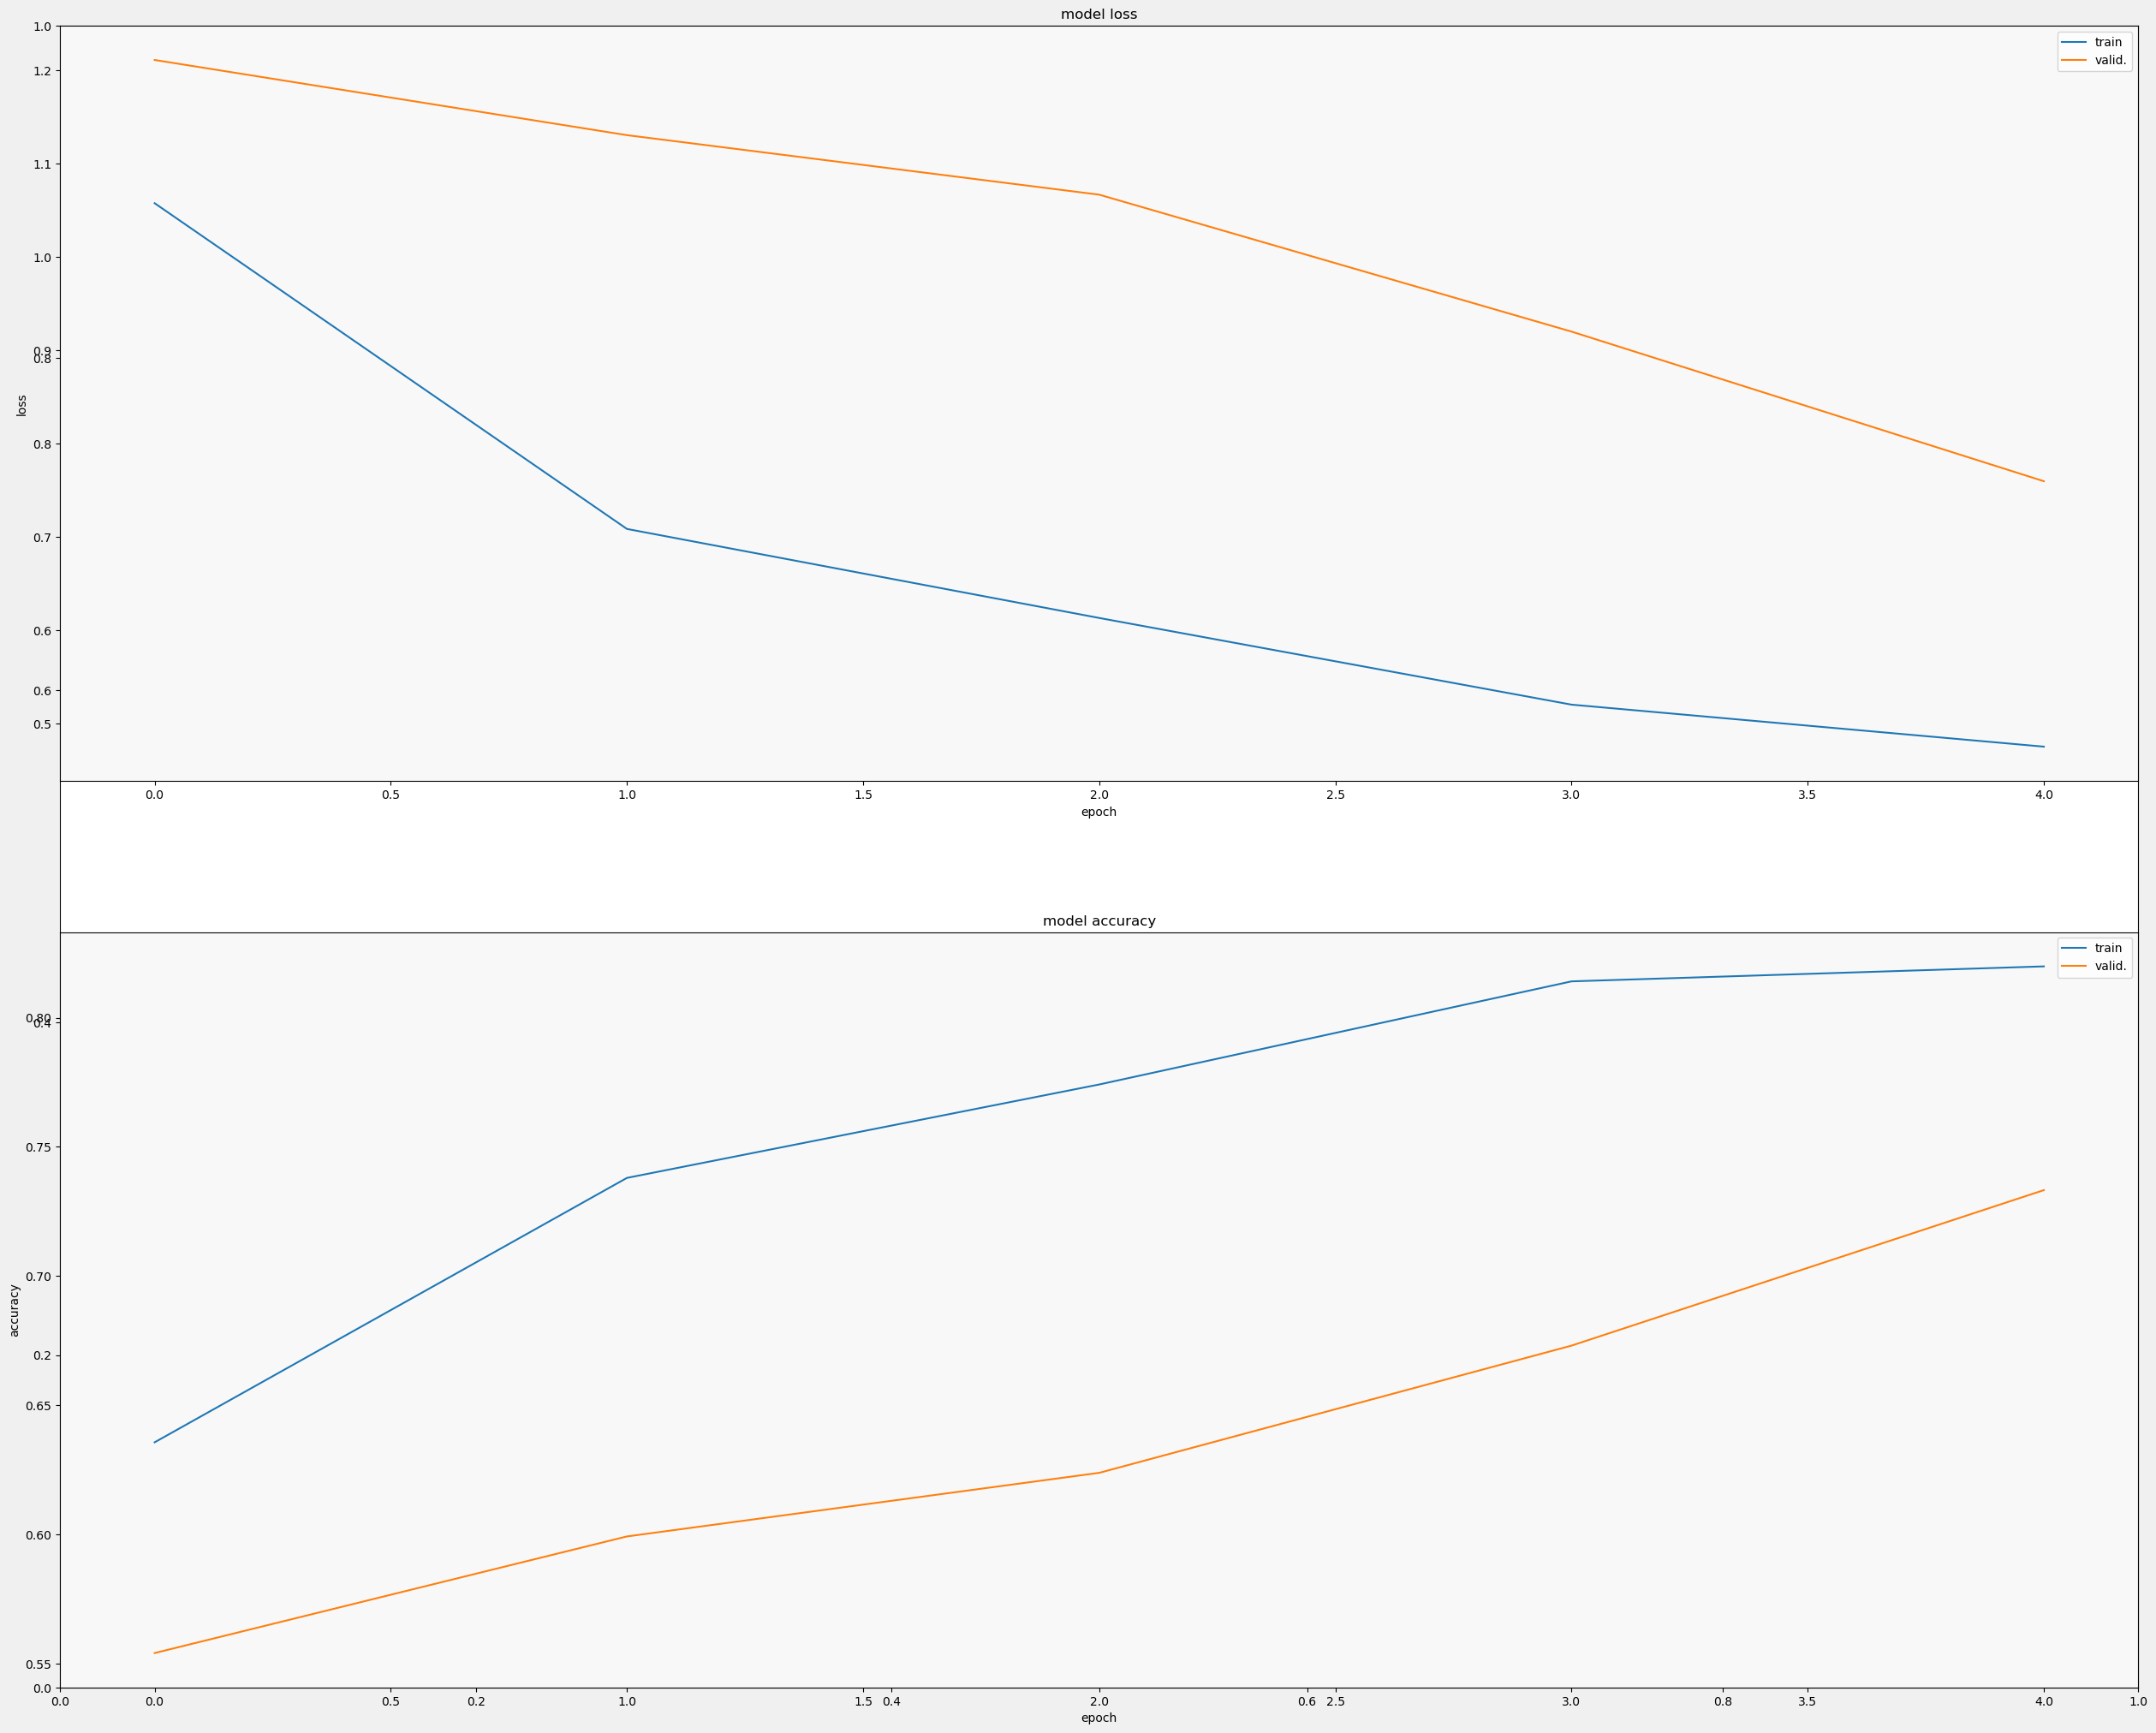

In [13]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)

In [22]:
def predict_new(path):
    img = cv2.imread(path)
    predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)
    
    print(f"Predicted: {predictions[pred[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted: Severe


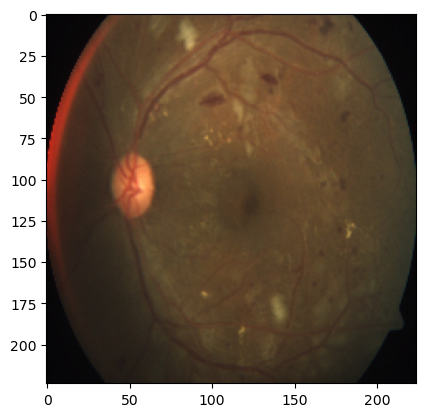

In [29]:
predict_new('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing\\Severe\\2f42e20db938.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted: NO_DR


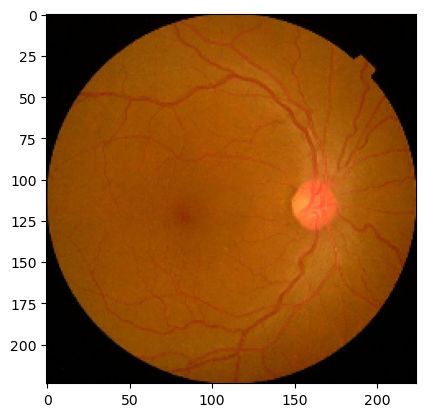

In [28]:
predict_new('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing/No_DR/1c13a1483f4a.png')